***In this initial iteration, we aim to develop a simple rule-based ride-matching algorithm. The focus is on matching riders and passengers based on proximity and timing, with minimal complexity.***



---



# **`Importing Libraries`**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **`Reading Data`**

In [3]:
riders = pd.DataFrame({
    'rider_id': [1, 2, 3],
    'pickup_location': [(10, 10), (20, 20), (15, 15)],
    'dropoff_location': [(50, 50), (60, 60), (55, 55)],
    'pickup_time': ['08:00', '09:00', '10:00']
})

passengers = pd.DataFrame({
    'passenger_id': [101, 102, 103],
    'pickup_location': [(12, 12), (25, 25), (14, 14)],
    'dropoff_location': [(52, 52), (65, 65), (54, 54)],
    'preferred_time': ['08:15', '09:15', '10:10']
})

# **`Plotting the pickup locations`**

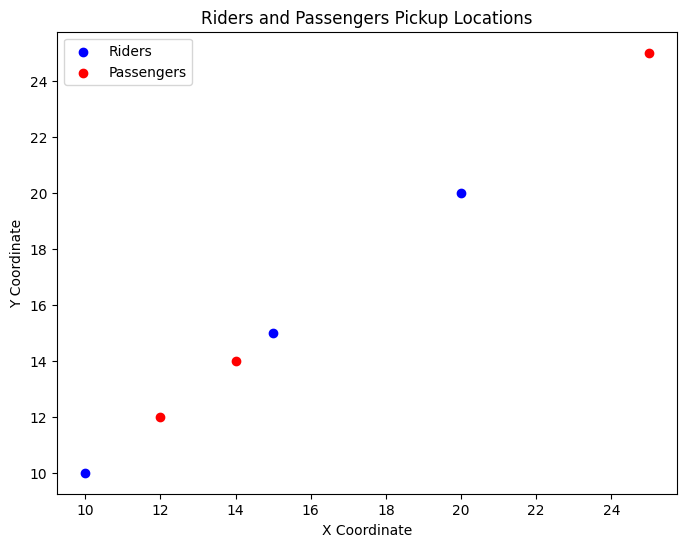

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(*zip(*riders['pickup_location']), color='blue', label='Riders')
plt.scatter(*zip(*passengers['pickup_location']), color='red', label='Passengers')
plt.legend()
plt.title('Riders and Passengers Pickup Locations')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# **`Rule-Based Matching Function`**

In [5]:
def rule_based_match(riders, passengers, radius=5):
    matches = []
    for _, rider in riders.iterrows():
        for _, passenger in passengers.iterrows():
            pickup_distance = np.linalg.norm(np.array(rider['pickup_location']) - np.array(passenger['pickup_location']))
            if pickup_distance <= radius:
                matches.append((rider['rider_id'], passenger['passenger_id']))
    return matches

In [6]:
matches_1 = rule_based_match(riders, passengers)
print("Iteration 1 - Rule-Based Matches:", matches_1)

Iteration 1 - Rule-Based Matches: [(1, 101), (3, 101), (3, 103)]


# **`Solution`**

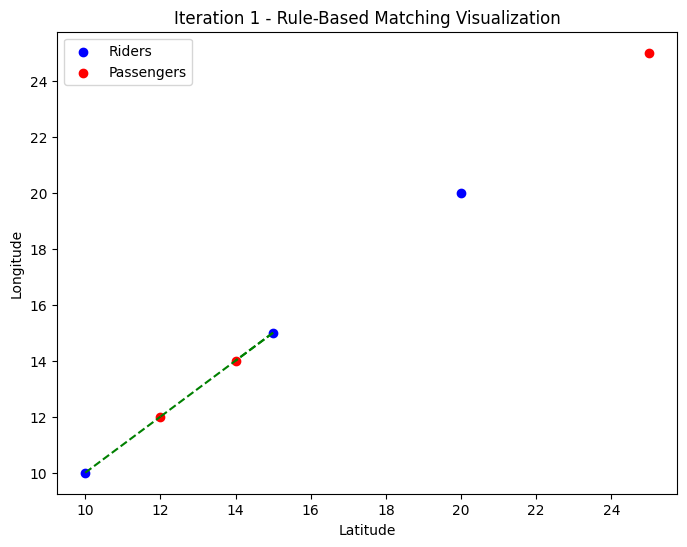

In [9]:
plt.figure(figsize=(8, 6))

# Plotting pickup locations
plt.scatter(*zip(*riders['pickup_location']), color='blue', label='Riders')
plt.scatter(*zip(*passengers['pickup_location']), color='red', label='Passengers')

# Plotting lines between matched pairs
for rider_id, passenger_id in matches_1:
    rider_loc = riders.loc[riders['rider_id'] == rider_id, 'pickup_location'].values[0]
    passenger_loc = passengers.loc[passengers['passenger_id'] == passenger_id, 'pickup_location'].values[0]
    plt.plot([rider_loc[0], passenger_loc[0]], [rider_loc[1], passenger_loc[1]], color='green', linestyle='--')

plt.legend()
plt.title('Iteration 1 - Rule-Based Matching Visualization')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()